# 6.5 - Regresyon Problemleri ve Lineer Regresyon Modeli: Modelin Eğitim Performansını Ölçme 

# 1 - Hava durumu modeli

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#import warnings

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
title_font = {"family":"arial", "weight":"bold", "color":"darkred", "size":16}
axis_font = {"family":"serif", "weight":"normal", "color":"darkgreen", "size":14}
# warnings.filterwarnings("ignore")

In [2]:
# %matplotlib inline
# pd.options.display.float_format = '{:.2f}'.format

weather = pd.read_csv("weatherHistory.csv")

weather.insert(3, "Temperature Difference (C)", 
               (weather["Temperature (C)"] - weather["Apparent Temperature (C)"]))

weather.drop(columns = ["Temperature (C)", "Apparent Temperature (C)", "Loud Cover"], inplace = True)

weather.head()

,Formatted Date,Summary,Precip Type,Temperature Difference (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,2.083333,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,2.127778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,0.000000,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,2.344444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,1.777778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


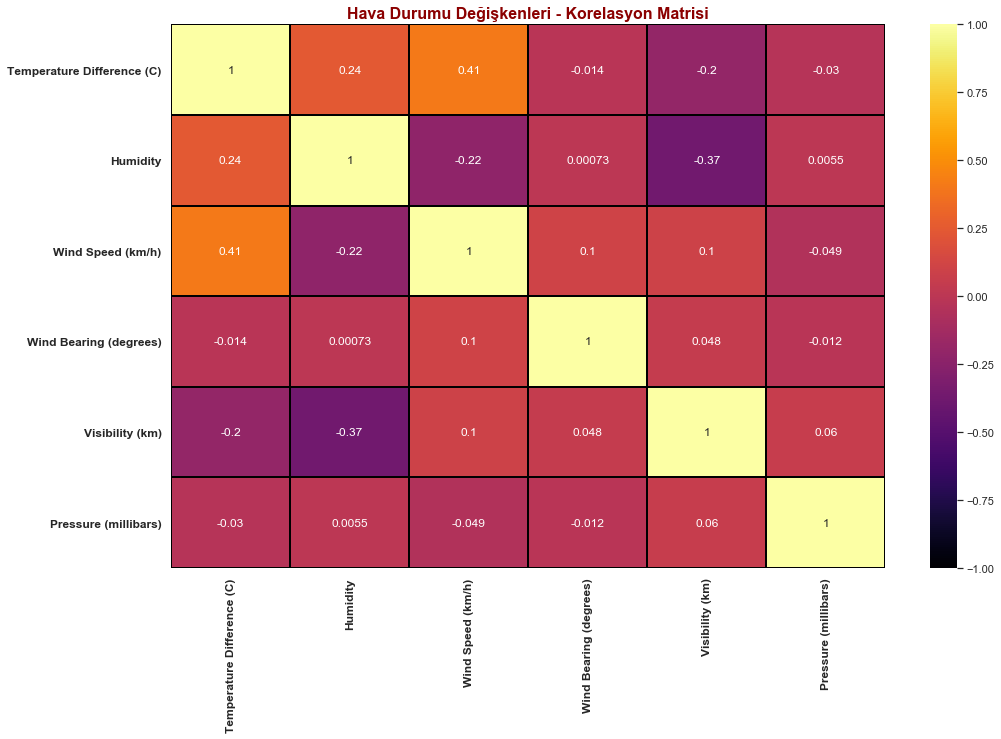

In [3]:
weather_corr = weather.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(weather_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "inferno", mask = None)
plt.xticks(size = 12, weight = "bold", rotation = 90)
plt.yticks(size = 12, weight = "bold")
plt.title("Hava Durumu Değişkenleri - Korelasyon Matrisi", fontdict = title_font)
plt.show()

In [4]:
x11 = weather[["Humidity", "Wind Speed (km/h)"]]
y1 = weather["Temperature Difference (C)"]

x11 = sm.add_constant(x11)
results11_model = sm.OLS(y1, x11)
results11 = results11_model.fit()
results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.288
Model:                                    OLS   Adj. R-squared:                  0.288
Method:                         Least Squares   F-statistic:                 1.949e+04
Date:                        Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                                11:27:56   Log-Likelihood:            -1.7046e+05
No. Observations:                       96453   AIC:                         3.409e+05
Df Residuals:                           96450   BIC:                         3.409e+05
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Yorum: $R^2$ ve adjusted $R^2$ değerleri oldukça düşüktür. Modelimiz, sıcaklık farkı varyansının yalnızca %28.8'ini açıklamaktadır. İyileştirme gerekmektedir.
***

In [5]:
# nem ve rüzgar hızı etkileşimi
weather["Humidity x Wind Speed"] = weather.Humidity * weather["Wind Speed (km/h)"]

x12 = weather[["Humidity", "Wind Speed (km/h)", "Humidity x Wind Speed"]]
# y1 = weather["Temperature Difference (C)"]


x12 = sm.add_constant(x12)
results12_model = sm.OLS(y1, x12)
results12 = results12_model.fit()
results12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.341
Model:                                    OLS   Adj. R-squared:                  0.341
Method:                         Least Squares   F-statistic:                 1.666e+04
Date:                        Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                                11:27:56   Log-Likelihood:            -1.6669e+05
No. Observations:                       96453   AIC:                         3.334e+05
Df Residuals:                           96449   BIC:                         3.334e+05
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity                 -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)        -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity x Wind Speed     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Yorum: $R^2$ ve adjusted $R^2$ değerleri hala düşüktür fakat en azından %34.1 gibi bir değere yükselmiştir. Yine de modelimizde iyileştirme yapmamız gerekmektedir.
***

In [6]:
x13 = weather[["Humidity", "Wind Speed (km/h)", "Visibility (km)"]]
# y1 = weather["Temperature Difference (C)"]

x13 = sm.add_constant(x13)
results13_model = sm.OLS(y1, x13)
results13 = results13_model.fit()
results13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.304
Model:                                    OLS   Adj. R-squared:                  0.303
Method:                         Least Squares   F-statistic:                 1.401e+04
Date:                        Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                                11:27:56   Log-Likelihood:            -1.6938e+05
No. Observations:                       96453   AIC:                         3.388e+05
Df Residuals:                           96449   BIC:                         3.388e+05
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5756      0.028    -56.605      0.000      -1.630      -1.521
Humidity              2.6066      0.025    102.784      0.000       2.557       2.656
Wind Speed (km/h)     0.1199      0.001    179.014      0.000       0.119       0.121
Visibility (km)      -0.0540      0.001    -46.614      0.000      -0.056      -0.052
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Yorumlar: Etkileşim terimi olan "Humidity x Wind Speed", "Visibility (km)" değişkeninden daha başarılı $R^2$ iyileştirmesi _(%34.1 vs %30.4)_ sergilemiştir. Dolayısıyla etkileşim terimi daha kullanışlıdır. Ayrıca AIC ve BIC değerlerine baktığımızda, en başarılı model olan Model 2'nin en düşük değerlere sahip olduğunu görürüz.

***
# 2. Ev fiyatları modeli
## Model 1

In [7]:
house = pd.read_csv("house_prices.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
y2 = house["SalePrice"]
x21 = house[["LotArea", "OverallQual", "GarageArea", "YearBuilt", "TotRmsAbvGrd", "YrSold"]]

In [9]:
x21 = sm.add_constant(x21)
results21_model = sm.OLS(y2, x21)
results21 = results21_model.fit()
results21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     663.4
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:27:56   Log-Likelihood:                -17581.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1453   BIC:                         3.521e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.603e+05   1.63e+06     -0.527      0.598   -4.06e+06    2.34e+06
LotArea          1.0684      0.111      9.610      0.000       0.850       1.286
OverallQual    2.96e+04   1117.993     26.472      0.000    2.74e+04    3.18e+04
GarageArea      66.6873      6.441     10.354      0.000      54.053      79.321
YearBuilt      314.3945     46.170      6.809      0.000     223.827     404.962
TotRmsAbvGrd  1.056e+04    768.369     13.738      0.000    9048.413    1.21e+04
YrSold          64.4211    812.145      0.079      0.937   -1528.681    1657.523
==============================================================================
Omnibus:                      663.770   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15879.366
Skew:                           1.571   Prob(JB):                         0.00
Kurtosis:                      18.848   Cond. No.                     2.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
## Model 2

In [10]:
# YrSold, LotArea, GarageArea ve TotRmsAbvGrd değişkenleri çıkarıldı; TotalBsmtSF eklendi.
x22 = house[["TotalBsmtSF", "OverallQual", "GrLivArea", "YearBuilt"]]

x22 = sm.add_constant(x22)
results22_model = sm.OLS(y2, x22)
results22 = results22_model.fit()
results22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1138.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:27:56   Log-Likelihood:                -17509.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1455   BIC:                         3.505e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.979e+05   8.17e+04    -10.996      0.000   -1.06e+06   -7.38e+05
TotalBsmtSF    31.8377      2.870     11.092      0.000      26.207      37.468
OverallQual  2.227e+04   1156.143     19.260      0.000       2e+04    2.45e+04
GrLivArea      55.4990      2.549     21.773      0.000      50.499      60.499
YearBuilt     418.6421     42.979      9.741      0.000     334.334     502.950
==============================================================================
Omnibus:                      516.057   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55936.570
Skew:                          -0.621   Prob(JB):                         0.00
Kurtosis:                      33.298   Cond. No.                     2.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
## Model 3

In [11]:
# ExterQual, BsmtQual ve GarageQual kategorik değişkenleri numerik değerlere dönüştürüldü.

house.ExterQual = house.ExterQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0})
house.BsmtQual = house.BsmtQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0})
house.GarageQual = house.GarageQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0, "Po":0})

x23 = house[["TotalBsmtSF", "OverallQual", "GrLivArea", "YearBuilt", 
             "ExterQual", "BsmtQual", "GarageQual"]]

x23 = sm.add_constant(x23)
results23_model = sm.OLS(y2, x23)
results23 = results23_model.fit()
results23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     698.2
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:27:56   Log-Likelihood:                -17468.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1452   BIC:                         3.499e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.286e+05   9.16e+04     -5.773      0.000   -7.08e+05   -3.49e+05
TotalBsmtSF    26.6717      2.925      9.119      0.000      20.934      32.409
OverallQual  1.617e+04   1310.590     12.339      0.000    1.36e+04    1.87e+04
GrLivArea      54.4585      2.489     21.876      0.000      49.575      59.342
YearBuilt     213.0542     48.748      4.371      0.000     117.430     308.678
ExterQual    2.033e+04   2706.459      7.511      0.000     1.5e+04    2.56e+04
BsmtQual     7939.5241   2004.338      3.961      0.000    4007.817    1.19e+04
GarageQual   6144.9822   2078.098      2.957      0.003    2068.588    1.02e+04
==============================================================================
Omnibus:                      513.083   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57800.881
Skew:                          -0.596   Prob(JB):                         0.00
Kurtosis:                      33.801   Cond. No.                     2.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Yorumlar:
### Model 1:
* **$R^2$ ve $adjusted R^2$ değerleri** : 0.733, 0.731
* **F-testi** : 663.4
* **Akaike Information Criterion (AIC)** : 35,180
* **Bayesian Information Criterion (BIC)** : 35,210

### Model 2:
* **$R^2$ ve $adjusted R^2$ değerleri** : 0.758, 0.757
* **F-testi** : 1138
* **Akaike Information Criterion (AIC)** : 35,030
* **Bayesian Information Criterion (BIC)** : 35,050

### Model 3:
* **$R^2$ ve $adjusted R^2$ değerleri** : 0.771, 0.770
* **F-testi** : 698.2
* **Akaike Information Criterion (AIC)** : 34,950
* **Bayesian Information Criterion (BIC)** : 34,990

## Sonuç:
* Model 1, tek başına yeterince başarılı bir sonuç ortaya koymakta, "Satış Fiyatı" varyansının %73'ünü açıklamaktadır.
* $R^2$ ve F-testi verilerini göz önüne aldığımızda, en başarılı modelin **Model 2** olduğunu görüyoruz. **"Bodrum katı toplam alanı"**, **"Genel kalite"**, **"Zemin kat üstü katların toplam alanı"**, **"Yapım yılı"** değişkenleri, modeli açıklamada düzgün bir performans göstermiştir.
* Fakat AIC ve BIC ile $R^2$ değerleri Model 3'te daha iyi bir performans ortaya koymuştur.